## Building a Basic CNN for Classification using TensorFlow and Keras

In [1]:

import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical


In [2]:

# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Reshape the data and normalize
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

# Convert labels to one-hot encoded format
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


In [3]:

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))


In [4]:

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [5]:

history = model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_data=(test_images, test_labels))


Epoch 1/5
938/938 [==============================] - 21s 21ms/step - loss: 0.1774 - accuracy: 0.9452 - val_loss: 0.0757 - val_accuracy: 0.9760
Epoch 2/5
938/938 [==============================] - 19s 20ms/step - loss: 0.0511 - accuracy: 0.9840 - val_loss: 0.0430 - val_accuracy: 0.9864
Epoch 3/5
938/938 [==============================] - 21s 22ms/step - loss: 0.0360 - accuracy: 0.9887 - val_loss: 0.0375 - val_accuracy: 0.9878
Epoch 4/5
938/938 [==============================] - 21s 22ms/step - loss: 0.0281 - accuracy: 0.9911 - val_loss: 0.0319 - val_accuracy: 0.9898
Epoch 5/5
938/938 [==============================] - 20s 21ms/step - loss: 0.0237 - accuracy: 0.9920 - val_loss: 0.0251 - val_accuracy: 0.9922


In [6]:

test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test Accuracy: {test_acc}")


313/313 [==============================] - 1s 4ms/step - loss: 0.0251 - accuracy: 0.9922
Test Accuracy: 0.9922000169754028


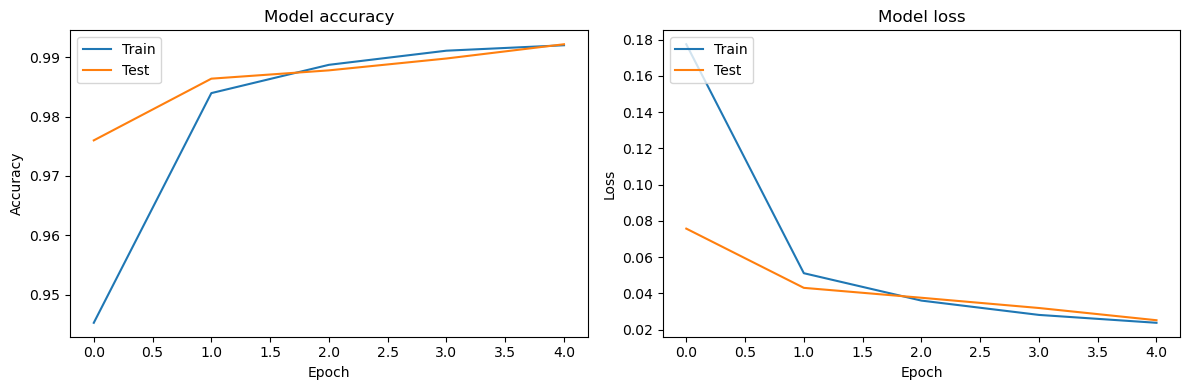

In [7]:

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.tight_layout()
plt.show()


In [9]:
# Assuming your model is named 'model'
model_path = "mnist_cnn_model.h5"
model.save(model_path)
print(f"Model saved to {model_path}")


Model saved to mnist_cnn_model.h5


C:\Users\sopha\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
